In [2]:
! pip install -q numpy pandas seaborn tensorflow matplotlib optuna sklearn xgboost catboost lightgbm

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"felix99999","key":"d6fe24537473d2b0c589bb3817e7a1b0"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d sampadab17/network-intrusion-detection --force

  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 116MB/s]


In [9]:
! unzip network-intrusion-detection.zip

Archive:  network-intrusion-detection.zip
  inflating: Test_data.csv           
  inflating: Train_data.csv          


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report
import warnings
warnings.filterwarnings('ignore')

In [11]:
data_train=pd.read_csv('/content/Train_data.csv')
data_test=pd.read_csv('/content/Test_data.csv')

In [12]:
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [13]:
data_train.shape

(25192, 42)

In [14]:
data_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [15]:
data_test.shape

(22544, 41)

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [17]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [18]:
def data_profiling(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [19]:
data_profiling(data_train)

,column,dtype,nunique,null,duplicates
0,duration,int64,758,0,24434
1,protocol_type,object,3,0,25189
2,service,object,66,0,25126
3,flag,object,11,0,25181
4,src_bytes,int64,1665,0,23527
5,dst_bytes,int64,3922,0,21270
6,land,int64,2,0,25190
7,wrong_fragment,int64,3,0,25189
8,urgent,int64,2,0,25190
9,hot,int64,22,0,25170


In [20]:
data_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [21]:
for i in data_train.columns:
    print(data_train[i].nunique)

<bound method IndexOpsMixin.nunique of 0        0
1        0
2        0
3        0
4        0
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: duration, Length: 25192, dtype: int64>
<bound method IndexOpsMixin.nunique of 0        tcp
1        udp
2        tcp
3        tcp
4        tcp
        ... 
25187    tcp
25188    tcp
25189    tcp
25190    tcp
25191    tcp
Name: protocol_type, Length: 25192, dtype: object>
<bound method IndexOpsMixin.nunique of 0        ftp_data
1           other
2         private
3            http
4            http
           ...   
25187        exec
25188    ftp_data
25189     private
25190        nnsp
25191      finger
Name: service, Length: 25192, dtype: object>
<bound method IndexOpsMixin.nunique of 0          SF
1          SF
2          S0
3          SF
4          SF
         ... 
25187    RSTO
25188      SF
25189     REJ
25190      S0
25191      S0
Name: flag, Length: 25192, dtype: object>
<bound method IndexOpsMixin.nunique of 0     

In [22]:
data_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<Axes: xlabel='count', ylabel='class'>

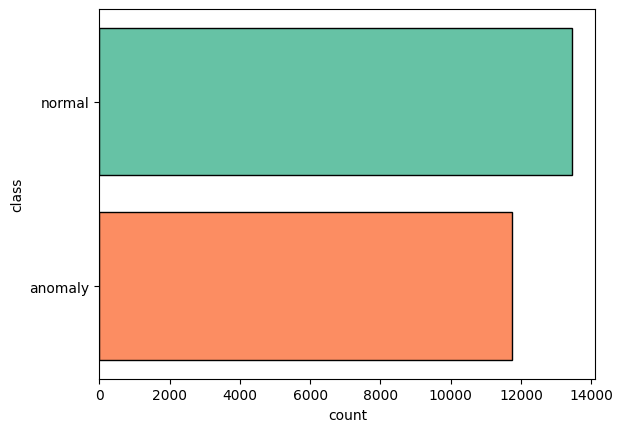

In [23]:
#Exploratory Data Analysis
sns.countplot(data=data_train,y='class',palette='Set2', edgecolor = "black", saturation = 1)

<Axes: xlabel='protocol_type', ylabel='count'>

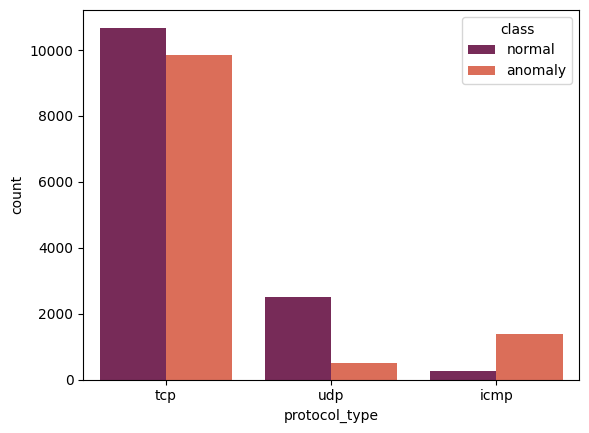

In [24]:
sns.countplot(data=data_train,x="protocol_type",hue='class',palette='rocket')

<Axes: xlabel='count', ylabel='flag'>

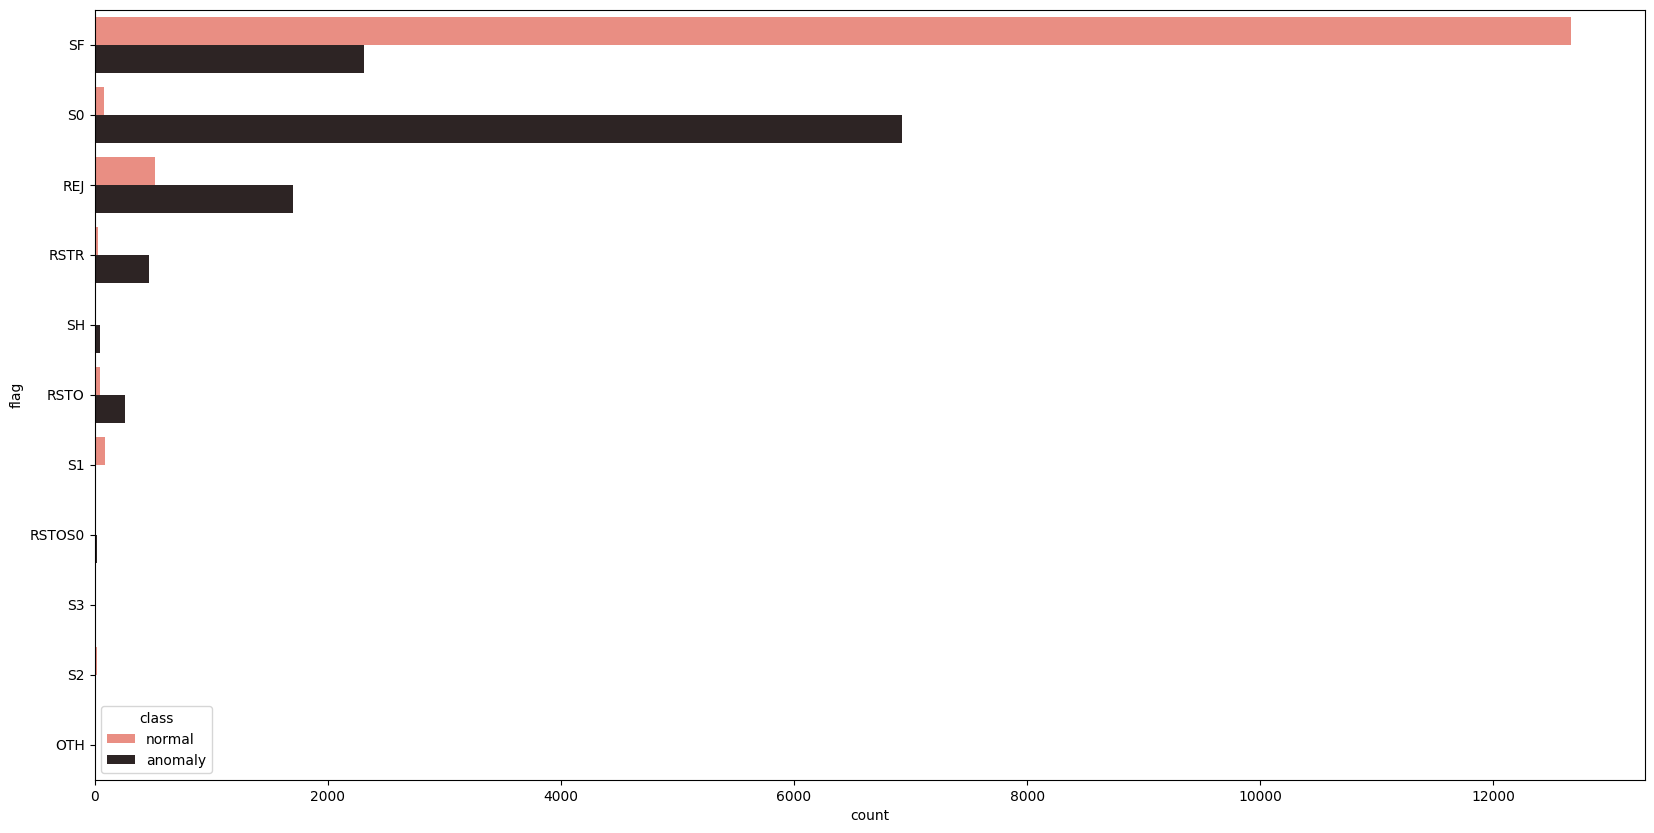

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(data=data_train,y='flag',hue='class',palette='dark:salmon_r')

In [26]:
def encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = preprocessing.LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

In [27]:
encoding(data_train)
encoding(data_test)

In [28]:
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
"""X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)
print(f"Shape of X_train: {X_train.shape}\nShape of X_valid: {X_valid.shape}")
print(f"Shape of y_train: {Y_train.shape}\nShape of y_valid: {Y_valid.shape}") """

'X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True, random_state=42)\nX_train.reset_index(drop=True, inplace=True)\nX_valid.reset_index(drop=True, inplace=True)\nY_train.reset_index(drop=True, inplace=True)\nX_valid.reset_index(drop=True, inplace=True)\nprint(f"Shape of X_train: {X_train.shape}\nShape of X_valid: {X_valid.shape}")\nprint(f"Shape of y_train: {Y_train.shape}\nShape of y_valid: {Y_valid.shape}") '

In [29]:
X_train, Y_train = data_train.iloc[:, :-1], data_train['class']

In [30]:
# Encode the labels
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)

In [31]:
X_train.shape

(25192, 41)

In [32]:
Y_train.shape

(25192,)

In [33]:
# Evaluate the model performance using KFold CV
kf = KFold(5, shuffle=True, random_state=42)
models = []   # Trained model record
fi = []   # Feature importance record
val_metrics = []   # Evaluation metrics record
fold = 0

for train_idx, val_idx in kf.split(X_train):
    print(f"=====Evaluation of fold{fold} starts=====")
    # Prepare the training and validation sets
    X_train_, X_val = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
    Y_train_, y_val = Y_train[train_idx], Y_train[val_idx]

    # Train the classifier (rfc)
    rfc = RandomForestClassifier(n_estimators=500)
    rfc.fit(X_train_, Y_train_)
    models.append(rfc)    # Record the trained model
    fi.append(rfc.feature_importances_)   # Record the feature importance

    # Predict and evaluate the performance
    y_val_pred = rfc.predict(X_val)
    p_r_f1_mac = list(precision_recall_fscore_support(y_val, y_val_pred, average='macro')[:3])
    p_r_f1_mic = list(precision_recall_fscore_support(y_val, y_val_pred, average='micro')[:3])
    p_r_f1_wei = list(precision_recall_fscore_support(y_val, y_val_pred, average='weighted')[:3])
    val_metrics.append([p_r_f1_mac, p_r_f1_mic, p_r_f1_wei])   # Concatenate the evaluation metrics and record
    print(f"=====Classification Report=====\n{classification_report(y_val, y_val_pred)}")

    print(f"=====Evaluation of fold{fold} finishes=====\n")
    fold += 1

=====Evaluation of fold0 starts=====
=====Classification Report=====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

=====Evaluation of fold0 finishes=====

=====Evaluation of fold1 starts=====
=====Classification Report=====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2324
           1       1.00      1.00      1.00      2715

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

=====Evaluation of fold1 finishes=====

=====Evaluation of fold2 starts=====
=====Classification Report=====
              precision    recall  f1-score   support

    

In [34]:
# Summarize the avarage performance in KFold CV
avg_metrics = np.mean(val_metrics, axis=0)
print("=====Average evaluatin metrics over 5 folds=====")
for i, method in enumerate(['Macro', 'Micro', 'Weighted']):
    print(f"=====Metrics {method}=====")
    print(f"Precision = {avg_metrics[i][0]} | Recall = {avg_metrics[i][1]} | F1-score = {avg_metrics[i][2]}")

=====Average evaluatin metrics over 5 folds=====
=====Metrics Macro=====
Precision = 0.9975881914180027 | Recall = 0.9973908700611792 | F1-score = 0.9974871451368301
=====Metrics Micro=====
Precision = 0.9974991729850556 | Recall = 0.9974991729850556 | F1-score = 0.9974991729850556
=====Metrics Weighted=====
Precision = 0.9975033555696896 | Recall = 0.9974991729850556 | F1-score = 0.9974989026711747


In [35]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [36]:
X = data_train.drop(['class'], axis=1)
y = data_train['class']

In [37]:
mutual_info = mutual_info_classif(X,y)
mutual_info

array([2.73534442e-02, 4.11522537e-02, 4.66858491e-01, 3.62051602e-01,
       5.63962940e-01, 4.35764688e-01, 0.00000000e+00, 3.12740420e-03,
       0.00000000e+00, 5.46250763e-03, 0.00000000e+00, 2.80163320e-01,
       6.79932715e-03, 3.84090052e-03, 1.28665981e-03, 6.25719220e-03,
       0.00000000e+00, 2.89662743e-04, 0.00000000e+00, 3.44522481e-03,
       5.14896333e-03, 0.00000000e+00, 2.67316807e-01, 6.85379916e-02,
       2.74092067e-01, 2.59582986e-01, 4.17940535e-02, 3.60569151e-02,
       3.56562918e-01, 3.60854700e-01, 1.00031600e-01, 1.39114197e-01,
       3.29554787e-01, 3.09276493e-01, 2.88328948e-01, 1.36313778e-01,
       1.92831622e-01, 2.81520786e-01, 2.75989439e-01, 4.46464834e-02,
       6.10612609e-02])

In [38]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.563963
service                        0.466858
dst_bytes                      0.435765
flag                           0.362052
diff_srv_rate                  0.360855
same_srv_rate                  0.356563
dst_host_srv_count             0.329555
dst_host_same_srv_rate         0.309276
dst_host_diff_srv_rate         0.288329
dst_host_serror_rate           0.281521
logged_in                      0.280163
dst_host_srv_serror_rate       0.275989
serror_rate                    0.274092
count                          0.267317
srv_serror_rate                0.259583
dst_host_srv_diff_host_rate    0.192832
dst_host_count                 0.139114
dst_host_same_src_port_rate    0.136314
srv_diff_host_rate             0.100032
srv_count                      0.068538
dst_host_srv_rerror_rate       0.061061
dst_host_rerror_rate           0.044646
rerror_rate                    0.041794
protocol_type                  0.041152
srv_rerror_rate                0.036057


<Axes: >

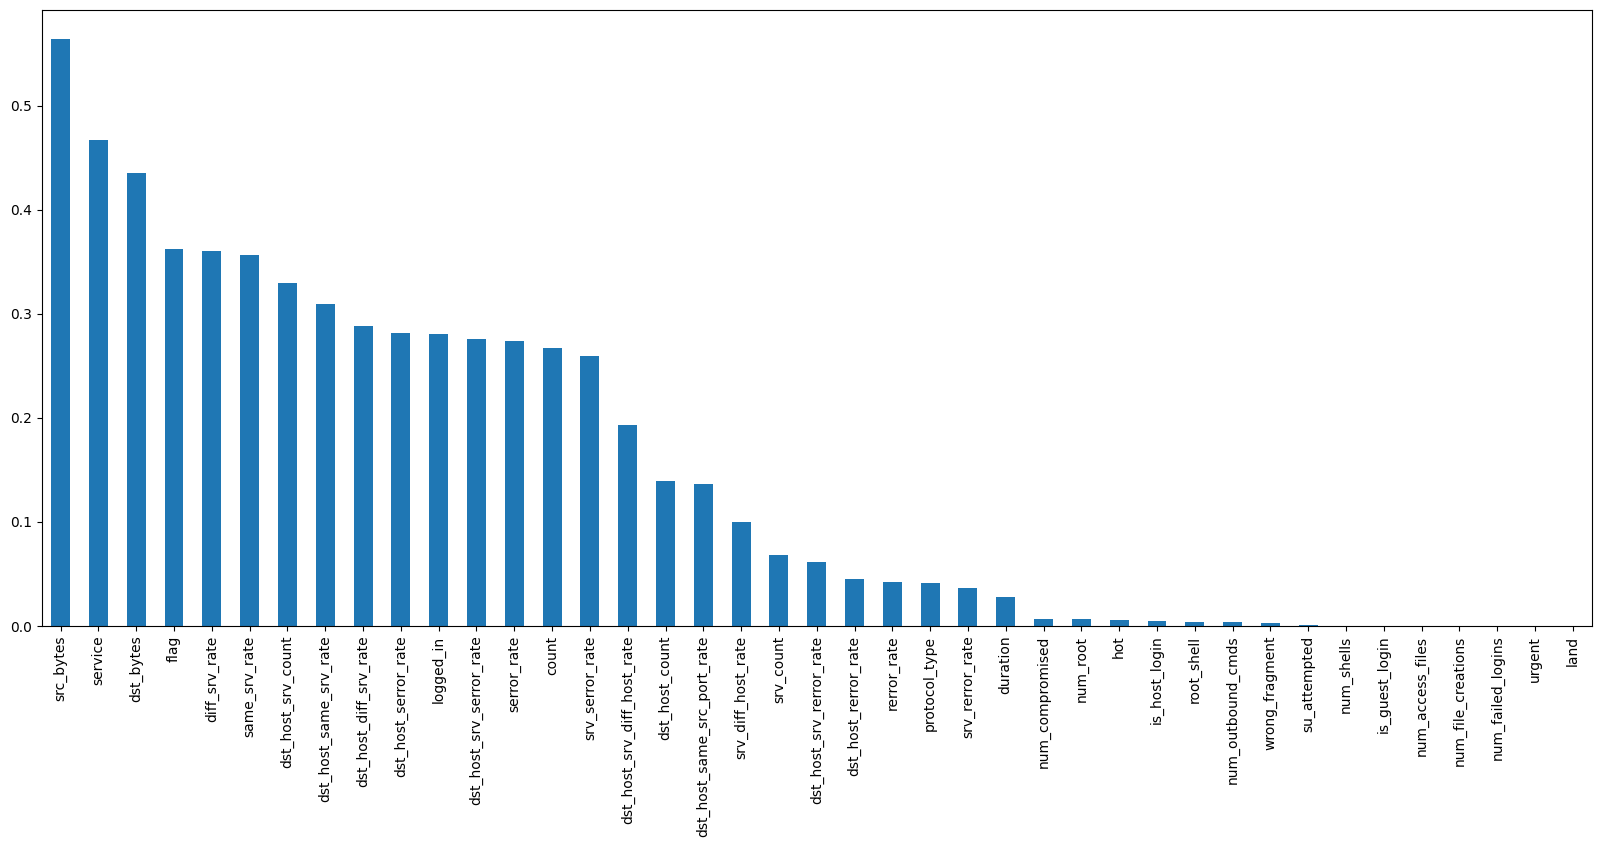

In [39]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [40]:
select_best_cols = SelectKBest(mutual_info_classif,k=25)
select_best_cols.fit(X,y)
selected_features = X.columns[select_best_cols.get_support()]

In [41]:
X=X[selected_features]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
sc = StandardScaler()

In [44]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [45]:
# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [46]:
#classification
def classalgo_test(x_train,x_test,y_train,y_test):

    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()

    algos = [g,b,kc,lr,dc,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]

    result = pd.DataFrame(index = algo_names)

    for algo in algos:

        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))


        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))


    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
    return result.sort_values('Test_Accuracy Score', ascending=False)

In [47]:
classalgo_test(X_train,X_test,y_train,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.997751,0.997528,0.997898,0.997751,0.997712
BaggingClassifier,1.000000,1.000000,1.000000,1.000000,0.997221,0.997033,0.997403,0.997221,0.997180
XGBClassifier,0.999716,0.999894,0.999734,0.999716,0.996560,0.997522,0.996781,0.996560,0.996599
GradientBoostingClassifier,0.996314,0.995649,0.996548,0.996314,0.996031,0.995553,0.996292,0.996031,0.995956
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.993517,0.995778,0.993927,0.993517,0.993624
AdaBoostClassifier,0.985880,0.982711,0.986821,0.985880,0.988224,0.985507,0.989030,0.988224,0.987899
KNeighborsClassifier,0.991550,0.991819,0.992082,0.991550,0.986240,0.989071,0.987110,0.986240,0.986321
LogisticRegression,0.947545,0.936407,0.951634,0.947545,0.949061,0.941134,0.952974,0.949061,0.947860
BernoulliNB,0.886753,0.855703,0.899258,0.886753,0.897989,0.865802,0.909433,0.897989,0.893523
GaussianNB,0.880628,0.872855,0.890359,0.880628,0.894417,0.887482,0.903014,0.894417,0.892570


In [48]:
rf=RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
rf_predict=rf.predict(X_test)

In [51]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [52]:
print(confusion_matrix(y_test,rf_predict))

[[3507    9]
 [   5 4037]]


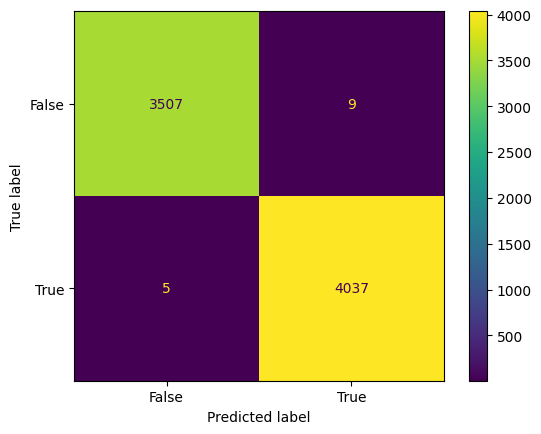

In [53]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,rf_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])

cm_display.plot()
plt.show()

In [54]:
Accuracy = metrics.accuracy_score(y_test,rf_predict)
Precision = metrics.precision_score(y_test,rf_predict)
Sensitivity_recall = metrics.recall_score(y_test,rf_predict)
Specificity = metrics.recall_score(y_test,rf_predict, pos_label=0)
F1_score = metrics.f1_score(y_test,rf_predict)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9981476581106112, 'Precision': 0.9977755808205635, 'Sensitivity_recall': 0.9987629886194953, 'Specificity': 0.9974402730375427, 'F1_score': 0.998269040553907}


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [56]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

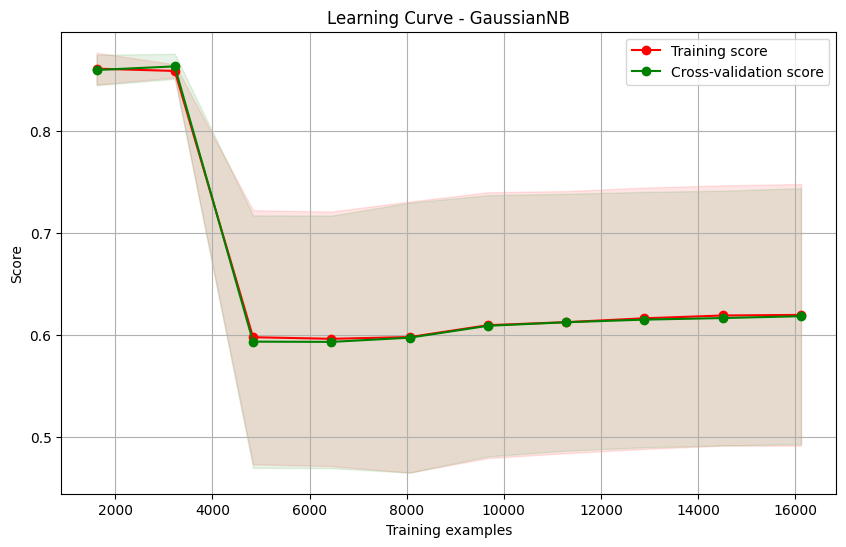

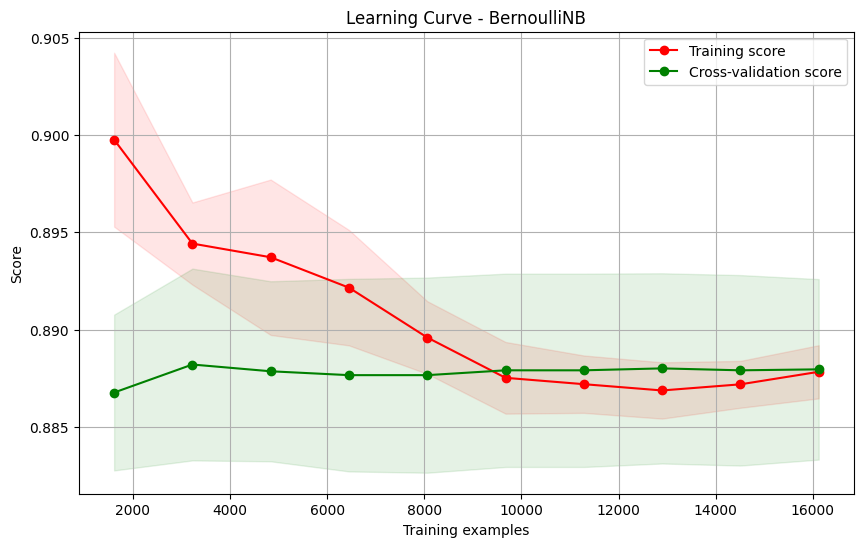

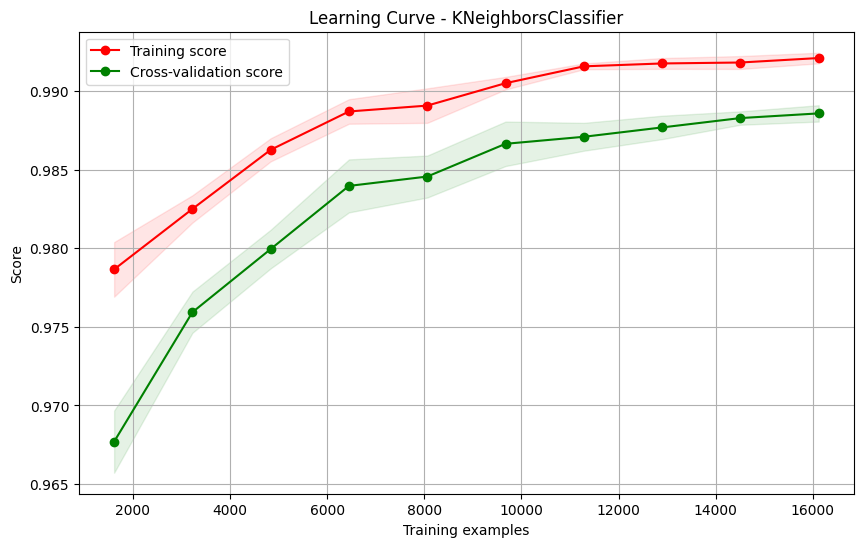

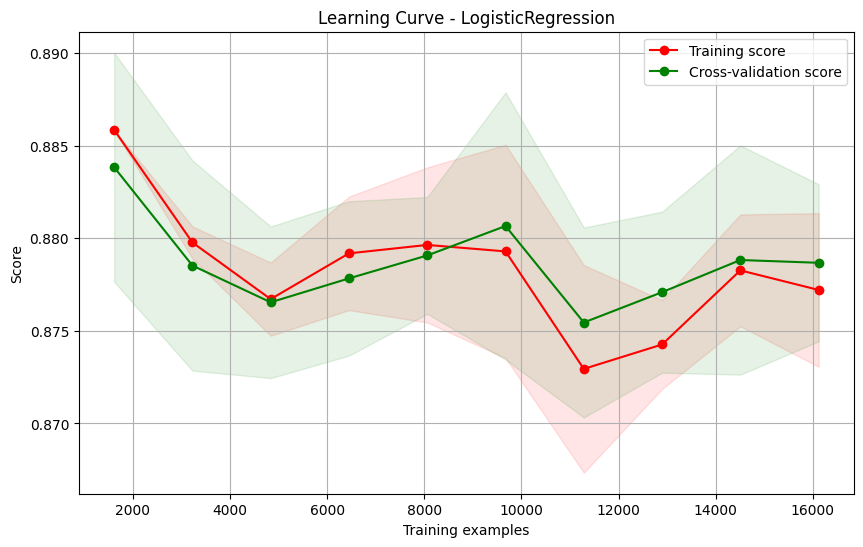

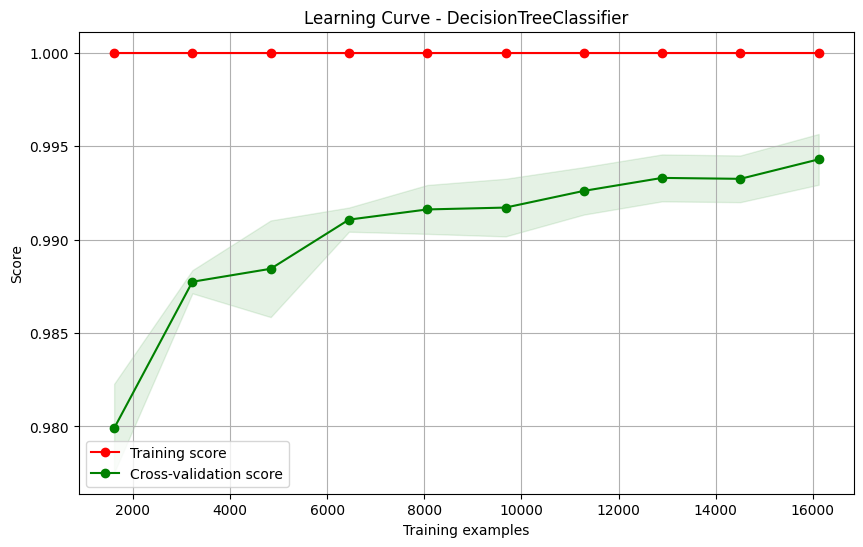

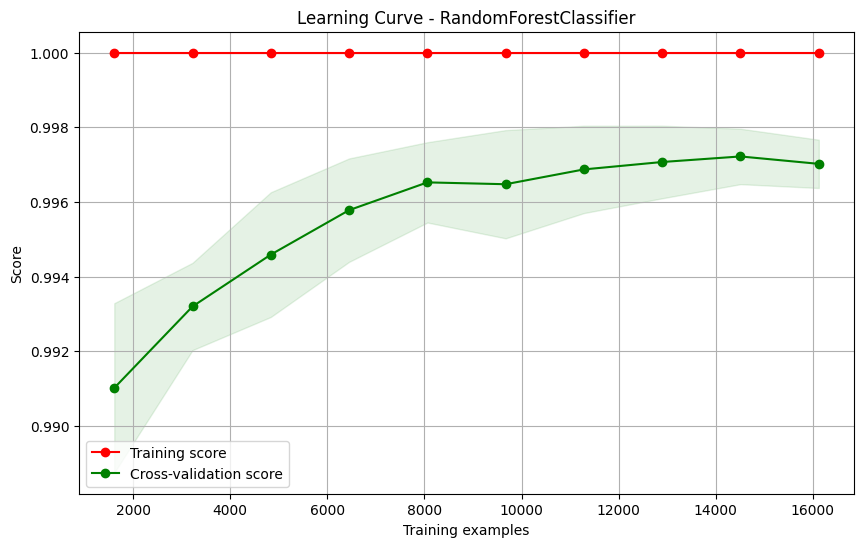

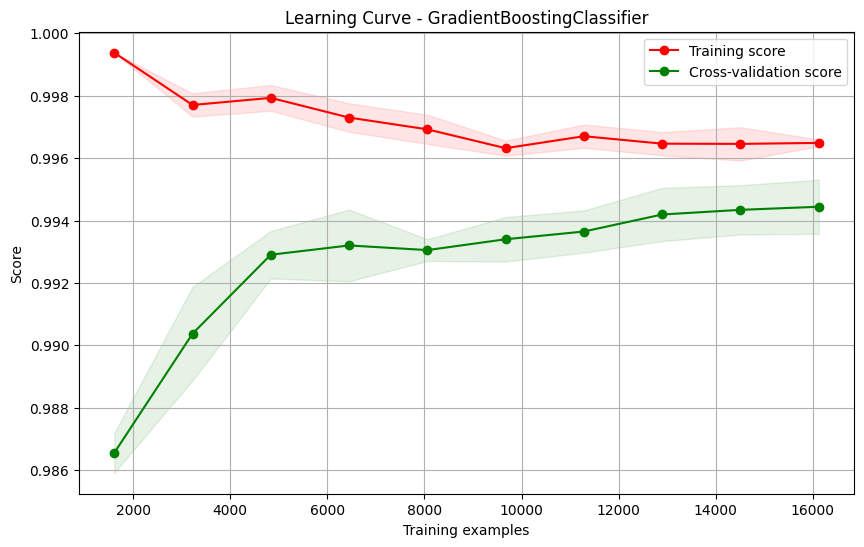

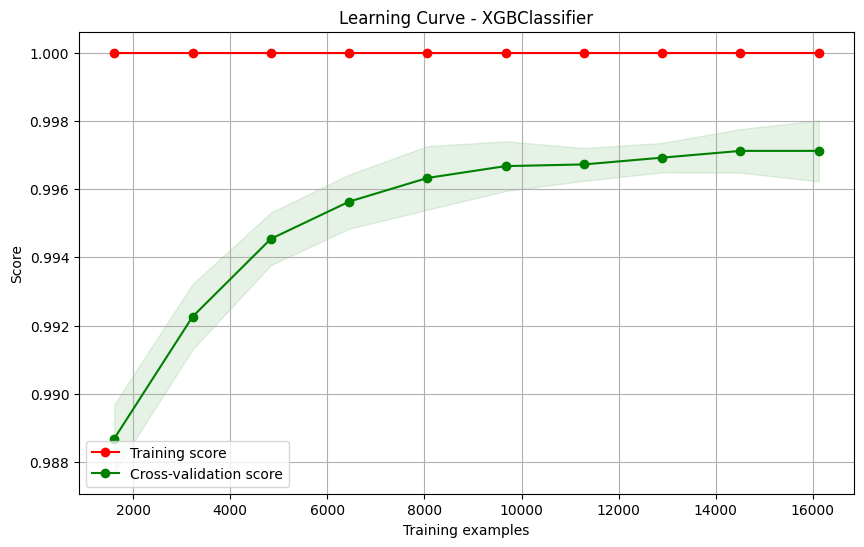

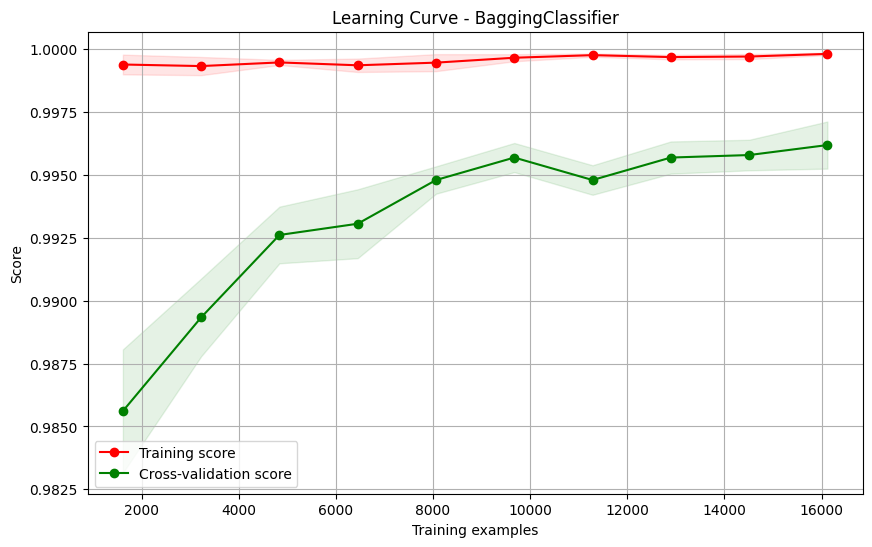

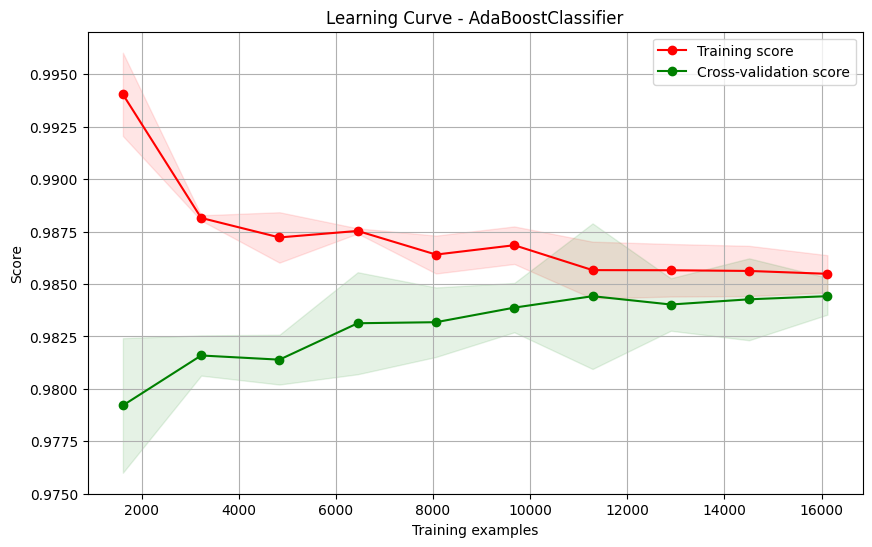

In [58]:
g=GaussianNB()
b=BernoulliNB()
kc=KNeighborsClassifier()
lr=LogisticRegression()
dc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
Bagging=BaggingClassifier()
AdaBoost=AdaBoostClassifier()


classifiers = [g, b, kc, lr, dc, rfc, gbc, xgb, Bagging, AdaBoost]
classifier_names = ['GaussianNB', 'BernoulliNB', 'KNeighborsClassifier', 'LogisticRegression',
                    'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier',
                    'XGBClassifier', 'BaggingClassifier', 'AdaBoostClassifier']

for classifier, name in zip(classifiers, classifier_names):
    plot_learning_curve(classifier, X_train, y_train, title=f"Learning Curve - {name}")
    plt.show()

In [59]:
from sklearn import metrics
from sklearn.metrics import f1_score
models = []
models.append(('Naive Baye Classifier', b))
models.append(('Decision Tree Classifier', dc))
models.append(('XG Boost Classifier', xgb))
models.append(('Random Forest Classifier', rfc))

In [61]:
from sklearn.model_selection import cross_val_score

In [63]:
for i, v in models:
    scores = cross_val_score(v, X_test, y_test, cv=10)
    accuracy = metrics.accuracy_score(y_test, v.rf_predict)
    confusion_matrix = metrics.confusion_matrix(y_test, v.rf_predict)
    classification = metrics.classification_report(y_test, v.rf_predict, digits=8)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()

AttributeError: ignored